In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
from nltk.corpus import stopwords

In [88]:
data = pd.read_csv("DurhamCityOriginalDataFY19.csv")
data.drop(['Unnamed: 0'], axis=1,inplace=True)
data['label']='0'
data.shape
data.head()

,page_number,word,label
0,1,fiscal,0
1,1,year,0
2,1,adopted,0
3,1,budget,0
4,1,july,0


In [89]:
data1 = pd.read_csv("DurhamCityOriginalDataFY20.csv")
data1.drop(['Unnamed: 0'], axis=1,inplace=True)
data1['label']='1'
data1.shape
data1.head()

,page_number,word,label
0,1,fiscal,1
1,1,year,1
2,1,adopted,1
3,1,budget,1
4,1,july,1


In [90]:
len(data)

76838

In [91]:
len(data1)

81524

In [92]:
cityBudget=pd.concat([data,data1])
len(cityBudget)

158362

In [93]:
cityBudget.word.unique()

array(['fiscal', 'year', 'adopted', ..., 'telling', 'pictured',
       'courthouse'], dtype=object)

In [94]:
cityBudget['word'].value_counts()

the                  8248
and                  7154
of                   4654
to                   3951
fy                   3442
for                  2841
in                   2102
a                    1792
city                 1603
fund                 1448
durham               1220
services             1115
is                   1087
program              1086
with                 1082
by                    781
from                  755
are                   738
on                    720
department            694
budget                675
this                  669
revenues              668
as                    667
community             650
development           633
that                  626
other                 625
management            593
service               564
                     ... 
subtracted              1
holistic                1
rightof                 1
cma                     1
annexes                 1
sixtynine               1
neighborhoodbased       1
cardealeraut

In [95]:
wd_counts = Counter()
for i, row in data.iterrows():
    wd_counts.update(row['word'].split())

In [96]:
for sw in stopwords.words('english'):
    del wd_counts[sw]

In [97]:
wd_counts.most_common(20)

[('fy', 1781),
 ('city', 783),
 ('fund', 736),
 ('durham', 585),
 ('services', 574),
 ('program', 548),
 ('development', 341),
 ('department', 337),
 ('revenues', 336),
 ('budget', 306),
 ('community', 294),
 ('management', 289),
 ('water', 287),
 ('service', 282),
 ('total', 281),
 ('public', 274),
 ('fte', 269),
 ('general', 265),
 ('funds', 255),
 ('capital', 246)]

In [98]:
len(wd_counts)

6108

In [99]:
wd_counts1 = Counter()
for i, row in data1.iterrows():
    wd_counts1.update(row['word'].split())

In [100]:
for sw in stopwords.words('english'):
    del wd_counts1[sw]

In [101]:
wd_counts1.most_common(20)

[('fy', 1661),
 ('city', 820),
 ('fund', 712),
 ('durham', 635),
 ('services', 541),
 ('program', 538),
 ('budget', 369),
 ('department', 357),
 ('community', 356),
 ('revenues', 332),
 ('management', 304),
 ('development', 292),
 ('service', 282),
 ('total', 282),
 ('public', 264),
 ('general', 259),
 ('water', 250),
 ('funds', 245),
 ('capital', 241),
 ('projects', 240)]

In [102]:
len(wd_counts1)

6364

In [103]:
#most common words in the combined datasets
wd_counts2 = Counter()
for i, row in cityBudget.iterrows():
    wd_counts2.update(row['word'].split())

In [104]:
for sw in stopwords.words('english'):
    del wd_counts2[sw]

In [105]:
wd_counts2.most_common(20)

[('fy', 3442),
 ('city', 1603),
 ('fund', 1448),
 ('durham', 1220),
 ('services', 1115),
 ('program', 1086),
 ('department', 694),
 ('budget', 675),
 ('revenues', 668),
 ('community', 650),
 ('development', 633),
 ('management', 593),
 ('service', 564),
 ('total', 563),
 ('public', 538),
 ('water', 537),
 ('general', 524),
 ('fte', 509),
 ('funds', 500),
 ('capital', 487)]

In [106]:
len(wd_counts2)

7121

In [107]:
from wordcloud import WordCloud

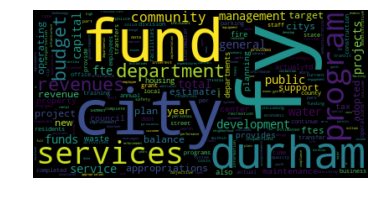

In [108]:

wc = WordCloud().generate_from_frequencies(wd_counts2)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

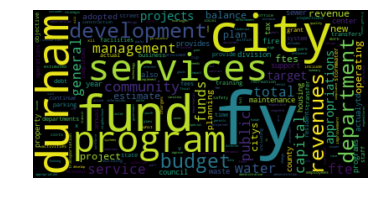

In [109]:
wc = WordCloud().generate_from_frequencies(wd_counts)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

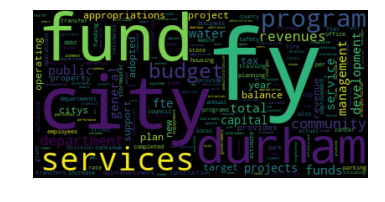

In [110]:
wc = WordCloud().generate_from_frequencies(wd_counts1)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()